<a href="https://colab.research.google.com/github/Paki180/PAKI-ML-1/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
import warnings

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, silhouette_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from imblearn.over_sampling import SMOTE # Import SMOTE for handling imbalance

# Set styles and suppress
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

Loading Dataset and checking

In [2]:
df = pd.read_excel('marketing_campaign.xlsx')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [5]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


EDA and feature engineering
1. filled missing income entries with the median salary
2. marital status categorization
3. addition of age, children count, family size, spend, channel purchased, campaign accepted and tenure columns
4. checked for outliers in age, income, tenure and recency
5. removed outliers in age and income
6. checked for duplicate ids

In [6]:
# EDA
income_median = df['Income'].median()
df.fillna({'Income':df['Income'].median()}, inplace=True)
print(f"Missing 'Income' values filled with median: {income_median}")

Missing 'Income' values filled with median: 51381.5


In [7]:
df['Marital_Status'] = df['Marital_Status'].replace({
    'Married': 'Partner',
    'Together': 'Partner',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'})

In [8]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Partner,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Partner,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Partner,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


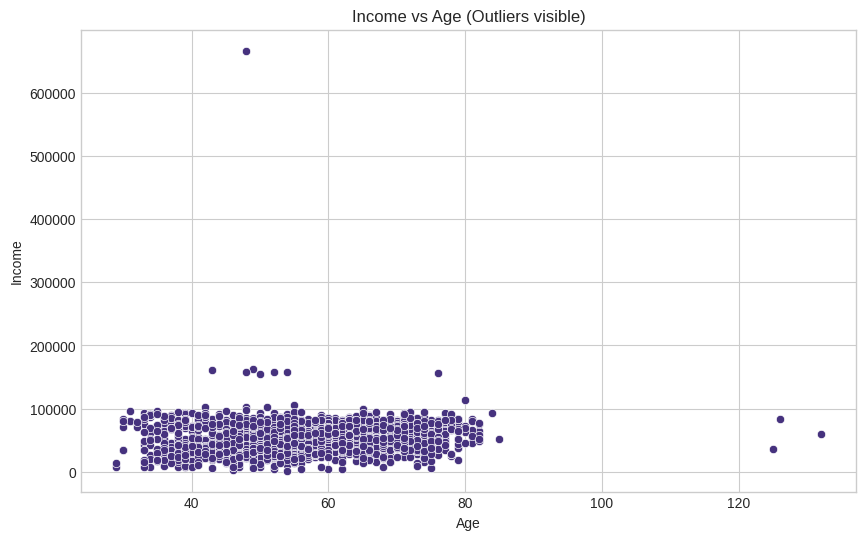

In [9]:
# Removing outliers in age and income
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Income', data=df)

plt.title('Income vs Age (Outliers visible)')
plt.xlabel('Age')
plt.ylabel('Income')

plt.grid(True)
plt.show()

In [10]:
# Remove outliers in Age and Income using IQR method

# Compute IQR for Age
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_age = Q1_age - 1.5 * IQR_age
upper_age = Q3_age + 1.5 * IQR_age

# Compute IQR for Income
Q1_inc = df['Income'].quantile(0.25)
Q3_inc = df['Income'].quantile(0.75)
IQR_inc = Q3_inc - Q1_inc
lower_inc = Q1_inc - 1.5 * IQR_inc
upper_inc = Q3_inc + 1.5 * IQR_inc

# Filter out outliers
df_clean= df[(df['Age'] >= lower_age) & (df['Age'] <= upper_age) &
              (df['Income'] >= lower_inc) & (df['Income'] <= upper_inc)]

print(f"Cleaned shape: {df_clean.shape}")
print(f"Removed {df.shape[0] - df_clean.shape[0]} outliers.")

Cleaned shape: (2229, 30)
Removed 11 outliers.


In [11]:
df= df_clean

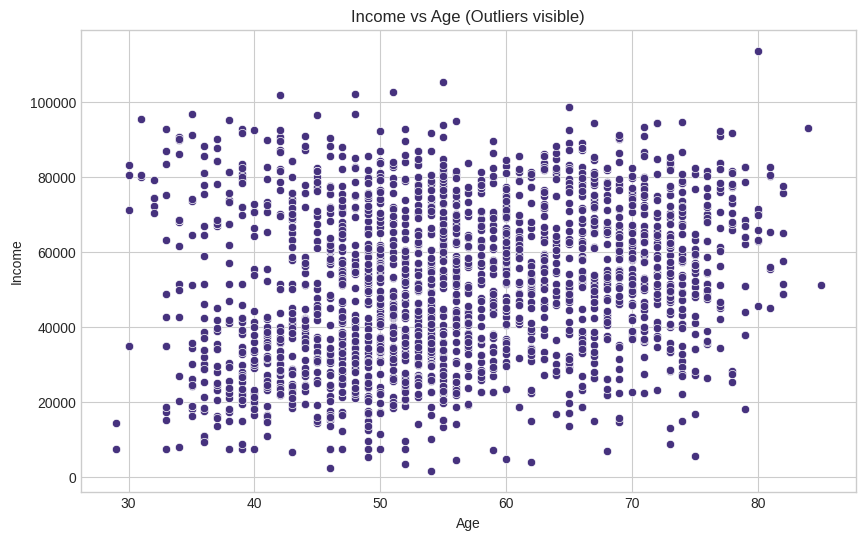

In [12]:
# plot after removing outliers in age and income
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Income', data=df)

plt.title('Income vs Age (Outliers visible)')
plt.xlabel('Age')
plt.ylabel('Income')

plt.grid(True)
plt.show()

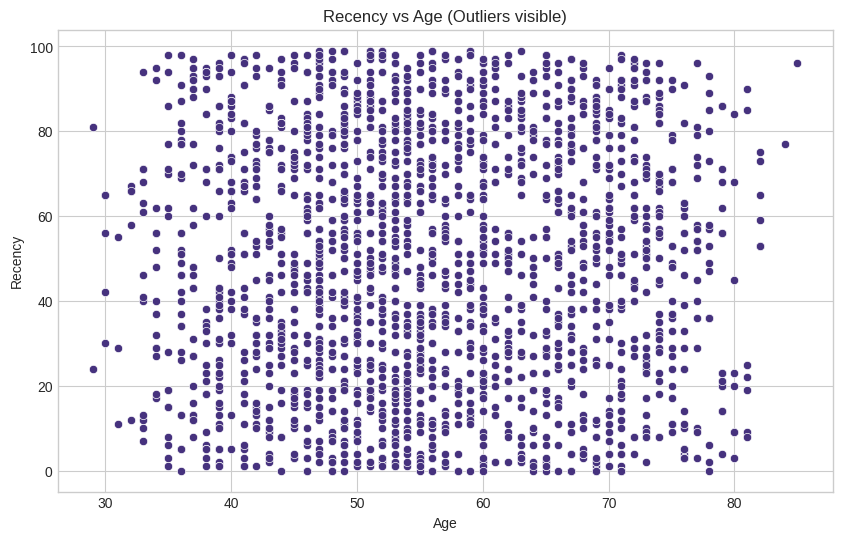

In [13]:
# checking for outliers in recency
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Recency', data=df)

plt.title('Recency vs Age (Outliers visible)')
plt.xlabel('Age')
plt.ylabel('Recency')

plt.grid(True)
plt.show()

In [14]:
# Convert Dt_Customer to a datetime and create a tenure feature
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Days_As_Customer'] = (datetime.now() - df['Dt_Customer']).dt.days


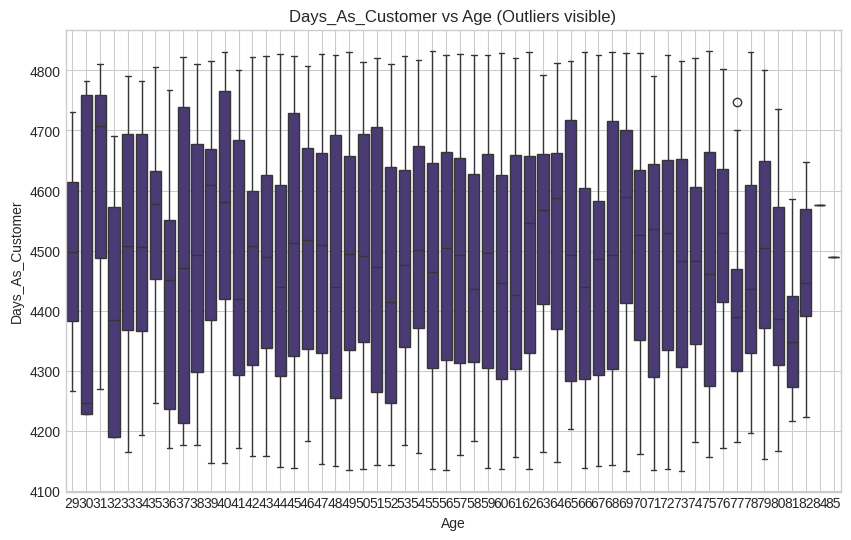

In [15]:
#checking for outliers in tenure
plt.figure(figsize=(10,6))
sns.boxplot(x='Age', y='Days_As_Customer', data=df)

plt.title('Days_As_Customer vs Age (Outliers visible)')
plt.xlabel('Age')
plt.ylabel('Days_As_Customer')

plt.grid(True)
plt.show()

In [16]:
# Check for duplicate IDs
duplicate_ids = df[df.duplicated(subset='ID', keep=False)]
print("Duplicate ID entries:\n", duplicate_ids)

# Number of duplicate rows
print("\nNumber of duplicate rows:", duplicate_ids.shape[0])

# Drop duplicate IDs (keep the first occurrence)
df = df.drop_duplicates(subset='ID', keep='first')

# Verify removal
print("\nShape after dropping duplicates:", df.shape)
print("Any duplicates left?", df.duplicated(subset='ID').any())

Duplicate ID entries:
 Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response, Age, Days_As_Customer]
Index: []

[0 rows x 31 columns]

Number of duplicate rows: 0

Shape after dropping duplicates: (2229, 31)
Any duplicates left? False


In [17]:
# household structure
df['ChildrenCount'] = df['Kidhome'] + df['Teenhome']
df['Family_Size'] = df['ChildrenCount'] + df['Marital_Status'].apply(lambda x: 2 if x == 'Partner' else 1)
df['marital_status'] = df['Marital_Status'].apply(lambda x: 1 if x == 'Partner' else 0)

In [18]:
# Create aggregate spending, purchase channel, and campaign acceptance features
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spent'] = df[spending_cols].sum(axis=1)

purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['Total_Purchases'] = df[purchase_cols].sum(axis=1)

campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df['Total_Campaign_Accepted'] = df[campaign_cols].sum(axis=1)

DATA PREPROCESSING

In [19]:
#ORDINALLY ENCODING EDUCATION
Education_Encoded = {'Basic': 1, '2n Cycle': 2, 'Graduation': 3, 'Master': 4,'PhD': 5}
df['Education_Encoded'] = df['Education'].map(Education_Encoded)

In [20]:
columns_to_drop = ['ID','Year_Birth','Education','Marital_Status','Kidhome','Teenhome','Dt_Customer', 'Z_CostContact',
                   'Z_Revenue','Complain','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']

# Drop columns that exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df = df.drop(existing_columns_to_drop, axis=1)

# Optionally, you might want to verify which columns were dropped
print(f"Dropped columns: {existing_columns_to_drop}")

df.head()

Dropped columns: ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Complain', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Response,Age,Days_As_Customer,ChildrenCount,Family_Size,marital_status,Total_Spent,Total_Purchases,Total_Campaign_Accepted,Education_Encoded
0,58138.0,58,635,88,546,172,88,88,3,8,...,1,68,4797,0,1,0,1617,22,1,3
1,46344.0,38,11,1,6,2,1,6,2,1,...,0,71,4247,2,3,0,27,4,0,3
2,71613.0,26,426,49,127,111,21,42,1,8,...,0,60,4446,0,2,1,776,20,0,3
3,26646.0,26,11,4,20,10,3,5,2,2,...,0,41,4273,1,3,1,53,6,0,3
4,58293.0,94,173,43,118,46,27,15,5,5,...,0,44,4295,1,3,1,422,14,0,5


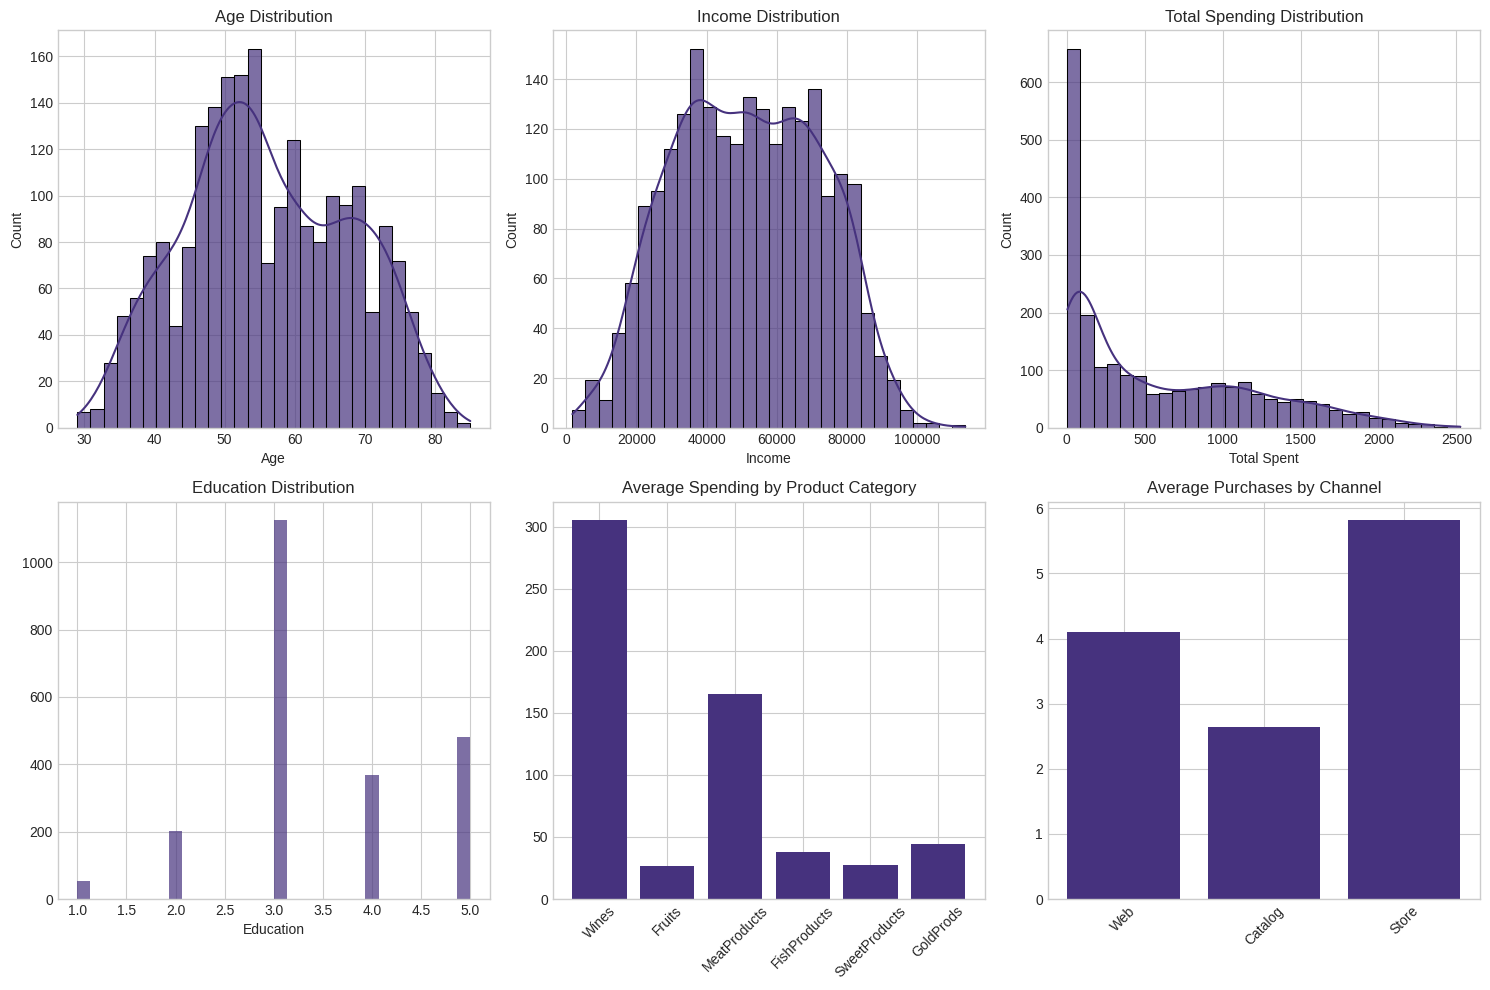

In [21]:
#analysis
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
# Age distribution
sns.histplot(data=df, x='Age', bins=30, alpha=0.7, ax=axes[0,0], kde=True)
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')

# Income distribution
sns.histplot(data=df, x='Income', bins=30, alpha=0.7, ax=axes[0,1], kde=True)
axes[0,1].set_title('Income Distribution')
axes[0,1].set_xlabel('Income')

# Total spending distribution
sns.histplot(data=df, x='Total_Spent', bins=30, alpha=0.7, ax=axes[0,2], kde=True)
axes[0,2].set_title('Total Spending Distribution')
axes[0,2].set_xlabel('Total Spent')

# education distribution
axes[1,0].hist(df['Education_Encoded'], bins=30, alpha=0.7)
axes[1,0].set_title('Education Distribution')
axes[1,0].set_xlabel('Education')

# Spending by product category
spending_by_category = df[spending_cols].mean()
axes[1,1].bar(range(len(spending_cols)), spending_by_category.values)
axes[1,1].set_title('Average Spending by Product Category')
axes[1,1].set_xticks(range(len(spending_cols)))
axes[1,1].set_xticklabels([col.replace('Mnt', '') for col in spending_cols], rotation=45)

# Purchase channels
purchase_by_channel = df[purchase_cols].mean()
axes[1,2].bar(range(len(purchase_cols)), purchase_by_channel.values)
axes[1,2].set_title('Average Purchases by Channel')
axes[1,2].set_xticks(range(len(purchase_cols)))
axes[1,2].set_xticklabels([col.replace('Num', '').replace('Purchases', '') for col in purchase_cols], rotation=45)

plt.tight_layout()
plt.show()

In [22]:
# Calculate skewness for each column
skewness = df.skew()

print("Skewness of each column:")
print(skewness)

# Apply log transformation to columns with absolute skewness >= 0.5
skewed_cols = skewness[abs(skewness) >= 0.5].index

for col in skewed_cols:
    # Apply log1p to handle potential zero values
    df[col] = np.log1p(df[col])

print("\nColumns with absolute skewness >= 0.5 transformed using log1p:")
print(skewed_cols)

# Verify skewness after transformation
print("\nSkewness after transformation:")
print(df.skew())

Skewness of each column:
Income                     0.013613
Recency                   -0.005478
MntWines                   1.172018
MntFruits                  2.099702
MntMeatProducts            1.890115
MntFishProducts            1.915486
MntSweetProducts           2.131146
MntGoldProds               1.881932
NumDealsPurchases          2.319279
NumWebPurchases            1.388094
NumCatalogPurchases        1.371133
NumStorePurchases          0.707211
NumWebVisitsMonth          0.219469
Response                   1.963439
Age                        0.089062
Days_As_Customer          -0.017444
ChildrenCount              0.414860
Family_Size                0.085973
marital_status            -0.602961
Total_Spent                0.862325
Total_Purchases            0.295444
Total_Campaign_Accepted    2.434332
Education_Encoded          0.127365
dtype: float64

Columns with absolute skewness >= 0.5 transformed using log1p:
Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts'

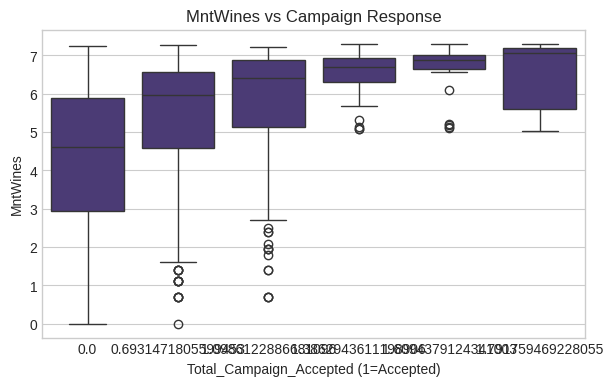

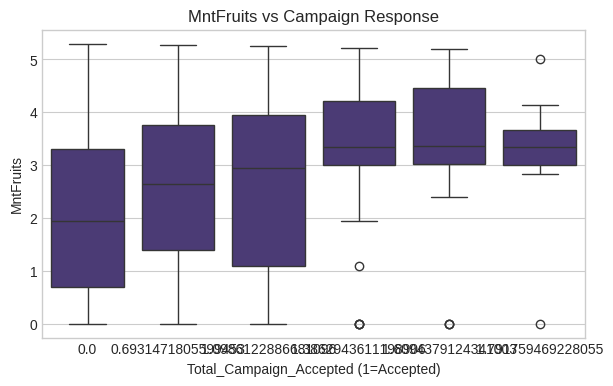

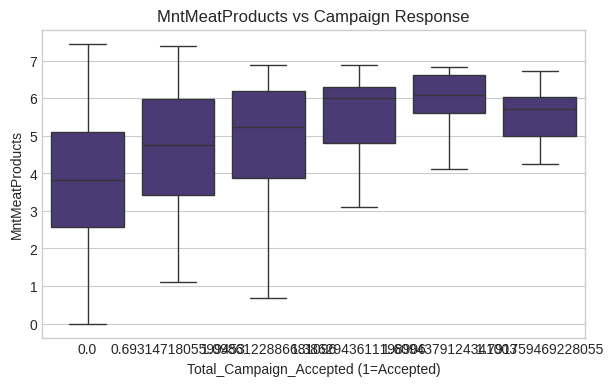

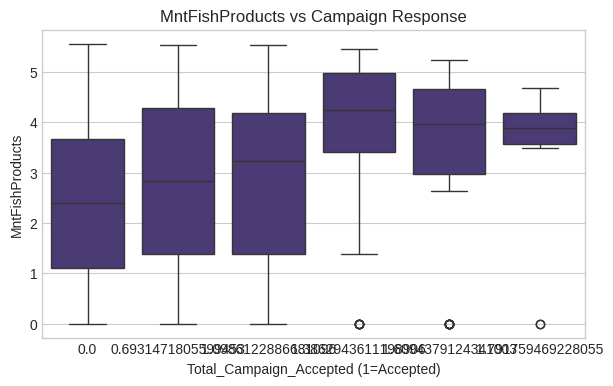

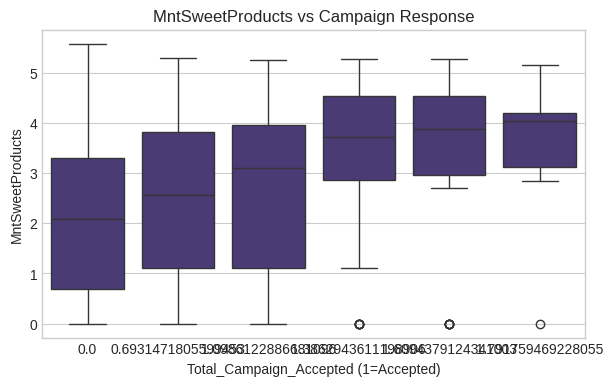

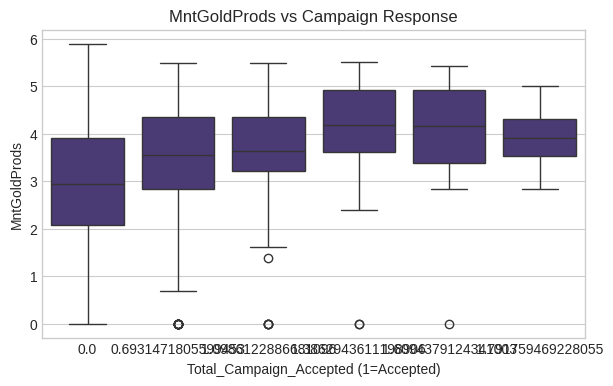

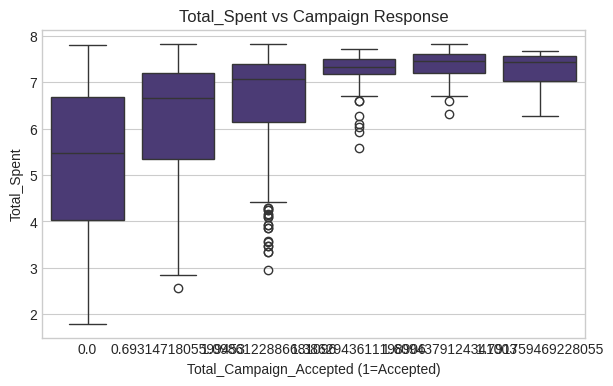

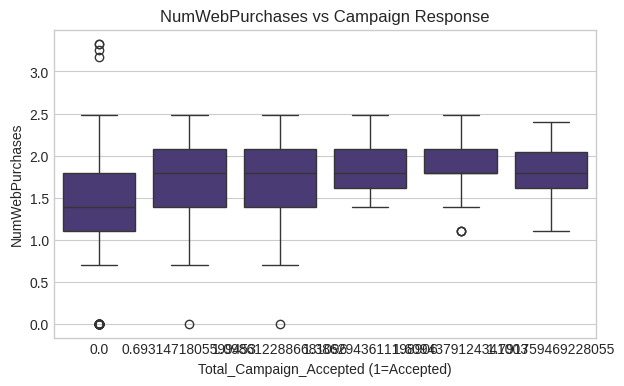

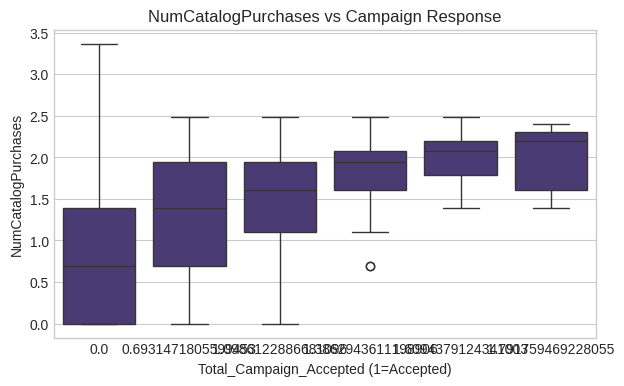

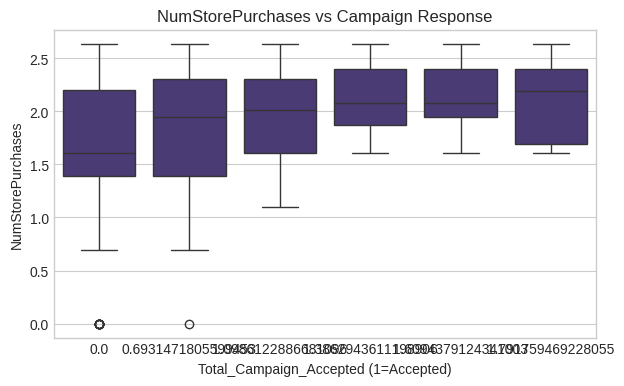

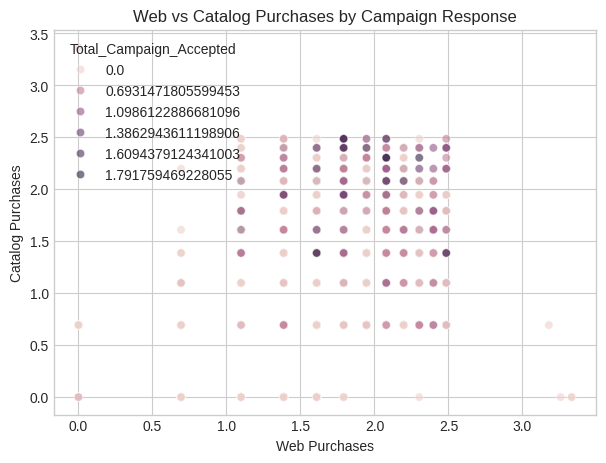

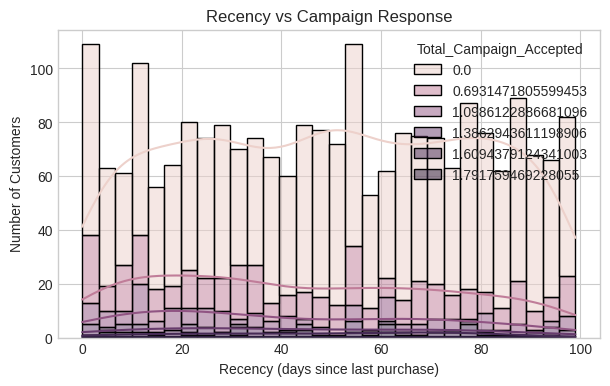

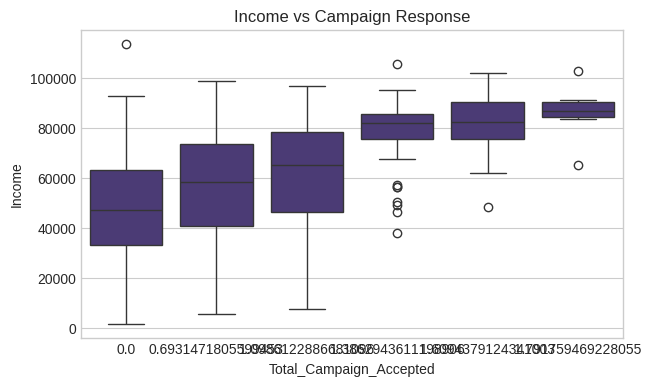

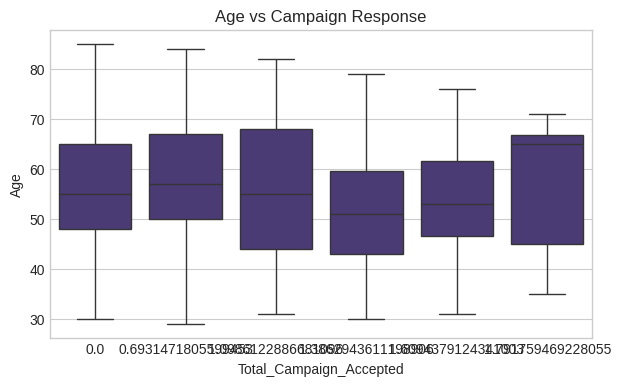

In [23]:
# (a) Boxplots for spending vs Nnmber of accepted campaigns
for col in spending_cols + ['Total_Spent']:
    plt.figure(figsize=(7,4))
    sns.boxplot(x='Total_Campaign_Accepted', y=col, data=df)
    plt.title(f'{col} vs Campaign Response')
    plt.xlabel('Total_Campaign_Accepted (1=Accepted)')
    plt.ylabel(col)
    plt.show()

# (b) Boxplots for purchase channels vs response
for col in purchase_cols:
    plt.figure(figsize=(7,4))
    sns.boxplot(x='Total_Campaign_Accepted', y=col, data=df)
    plt.title(f'{col} vs Campaign Response')
    plt.xlabel('Total_Campaign_Accepted (1=Accepted)')
    plt.ylabel(col)
    plt.show()

# (c) Scatterplot for interaction between web & catalog purchases
plt.figure(figsize=(7,5))
sns.scatterplot(x='NumWebPurchases', y='NumCatalogPurchases',
                hue='Total_Campaign_Accepted', data=df, alpha=0.6)
plt.title('Web vs Catalog Purchases by Campaign Response')
plt.xlabel('Web Purchases')
plt.ylabel('Catalog Purchases')
plt.legend(title='Total_Campaign_Accepted')
plt.show()

# (d) Recency vs response
plt.figure(figsize=(7,4))
sns.histplot(data=df, x='Recency', hue='Total_Campaign_Accepted', bins=30, kde=True, multiple='stack')
plt.title('Recency vs Campaign Response')
plt.xlabel('Recency (days since last purchase)')
plt.ylabel('Number of Customers')
plt.show()

# (e) Demographics vs response
plt.figure(figsize=(7,4))
sns.boxplot(x='Total_Campaign_Accepted', y='Income', data=df)
plt.title('Income vs Campaign Response')
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(x='Total_Campaign_Accepted', y='Age', data=df)
plt.title('Age vs Campaign Response')
plt.show()

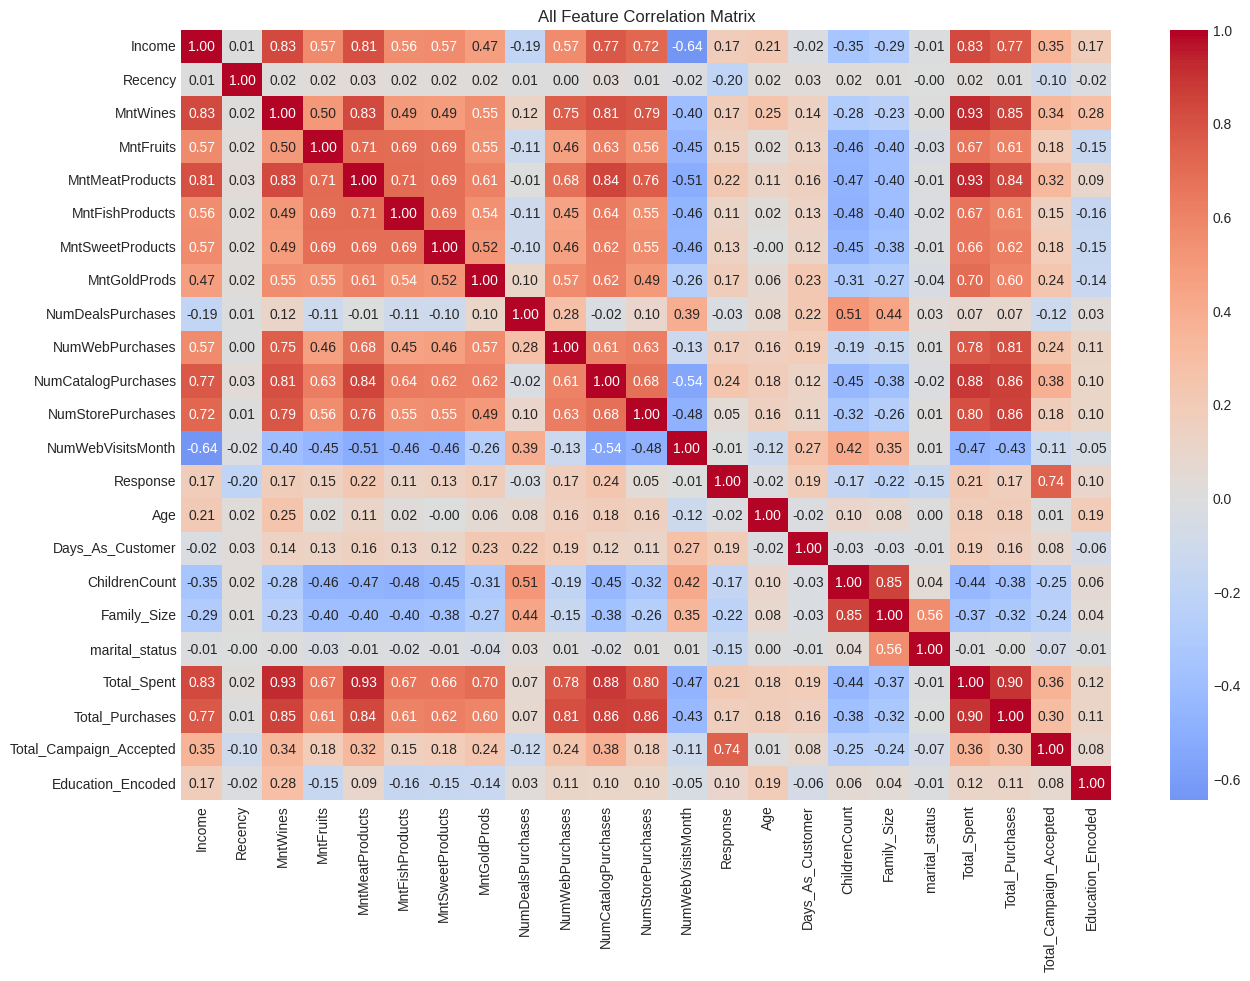

In [24]:
# Correlation heatmap
plt.figure(figsize=(15, 10)) # Increased figure size for better readability
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, fmt=".2f") # Include all features and format annotations
plt.title('All Feature Correlation Matrix')
plt.show()

K-Means Clustering

In [25]:
##customer segmentation
# Select features for clustering analysis
clustering_features = df.columns.tolist()


X_clustering = df[clustering_features].copy()


# Standardise features as K-Means is distance-based
scaler_clustering = StandardScaler()
X_clustering_scaled = scaler_clustering.fit_transform(X_clustering)

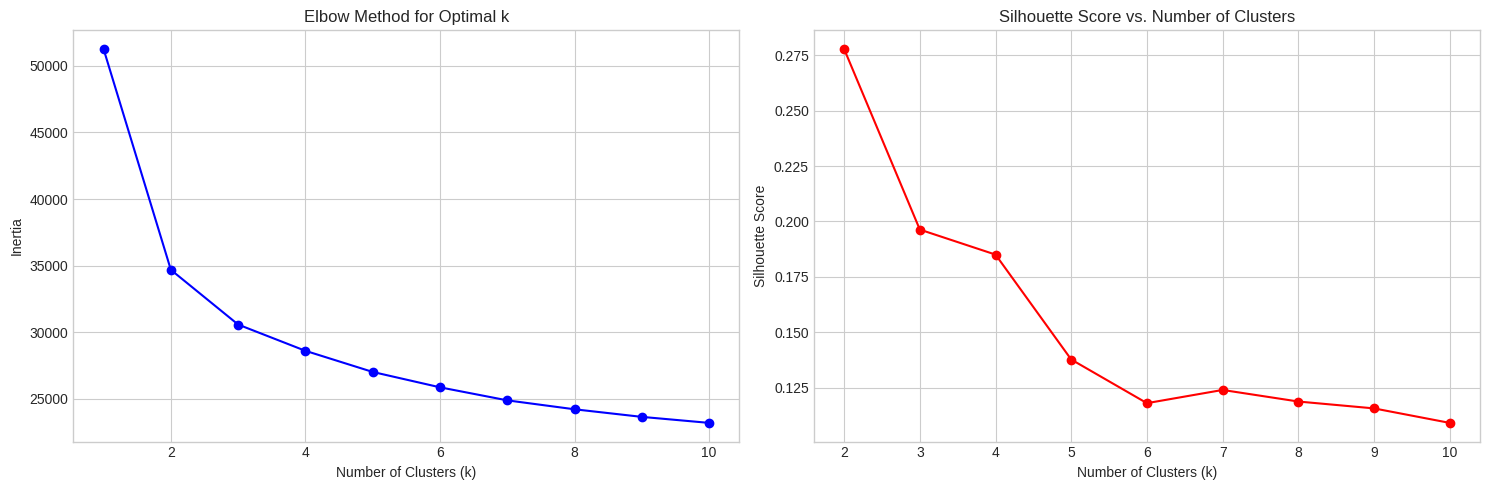

In [26]:
inertias = []
silhouette_scores = []
k_range_inertia = range(1, 11) # Start k from 1 for inertia
k_range_silhouette = range(2, 11) # Start k from 2 for silhouette score

for k in k_range_inertia:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_clustering_scaled)
    inertias.append(kmeans.inertia_)

for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_clustering_scaled)
    silhouette_scores.append(silhouette_score(X_clustering_scaled, kmeans.labels_))


# Plot Elbow Curve and Silhouette Scores to determine k
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(k_range_inertia, inertias, 'bo-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method for Optimal k')

ax2.plot(k_range_silhouette, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score vs. Number of Clusters')
plt.tight_layout()
plt.show()

In [27]:
# Apply K-Means with optimal number of clusters
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans_final.fit_predict(X_clustering_scaled)


print(f"Clustering completed with {optimal_k} clusters")
print(f"Cluster distribution:")
print(df['Cluster'].value_counts().sort_index())

Clustering completed with 4 clusters
Cluster distribution:
Cluster
0    853
1    596
2    585
3    195
Name: count, dtype: int64


In [28]:
# --- Cluster Profiling ---
profile_features_for_analysis = ['Age', 'Income', 'Total_Spent', 'Total_Purchases', 'Family_Size']
cluster_profiles = df.groupby('Cluster')[profile_features_for_analysis].mean().round(2)
print("\n--- Cluster Profiles ---")
print(cluster_profiles)
print("\n")


--- Cluster Profiles ---
           Age    Income  Total_Spent  Total_Purchases  Family_Size
Cluster                                                            
0        52.93  32408.01         3.97             5.04         2.89
1        57.84  70672.78         6.97            19.28         2.10
2        58.92  52103.97         6.12            14.27         3.00
3        56.30  75969.48         7.24            19.65         1.62




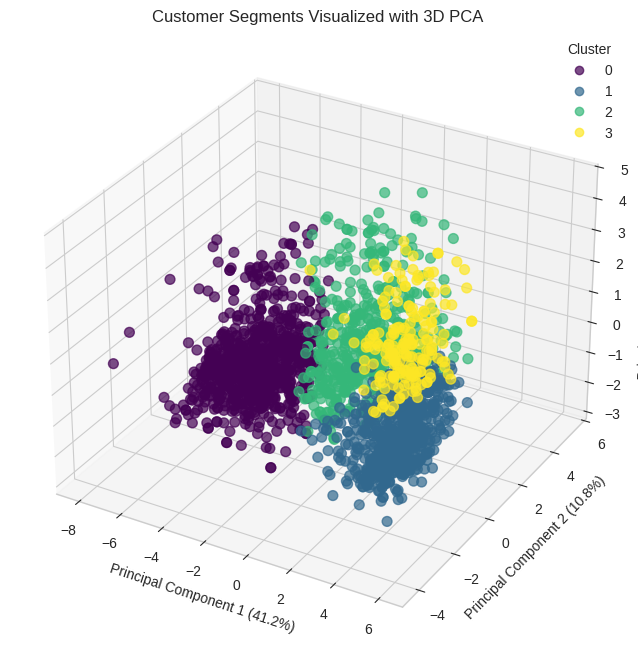

In [29]:
# Use PCA to visualize the clusters in 3D
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_clustering_scaled)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use df['Cluster'] for coloring
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                     c=df['Cluster'], cmap='viridis', s=50, alpha=0.7)

ax.set_title('Customer Segments Visualized with 3D PCA')
ax.set_xlabel(f'Principal Component 1 ({pca_3d.explained_variance_ratio_[0]:.1%})')
ax.set_ylabel(f'Principal Component 2 ({pca_3d.explained_variance_ratio_[1]:.1%})')
ax.set_zlabel(f'Principal Component 3 ({pca_3d.explained_variance_ratio_[2]:.1%})')

# Add a legend
legend = ax.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

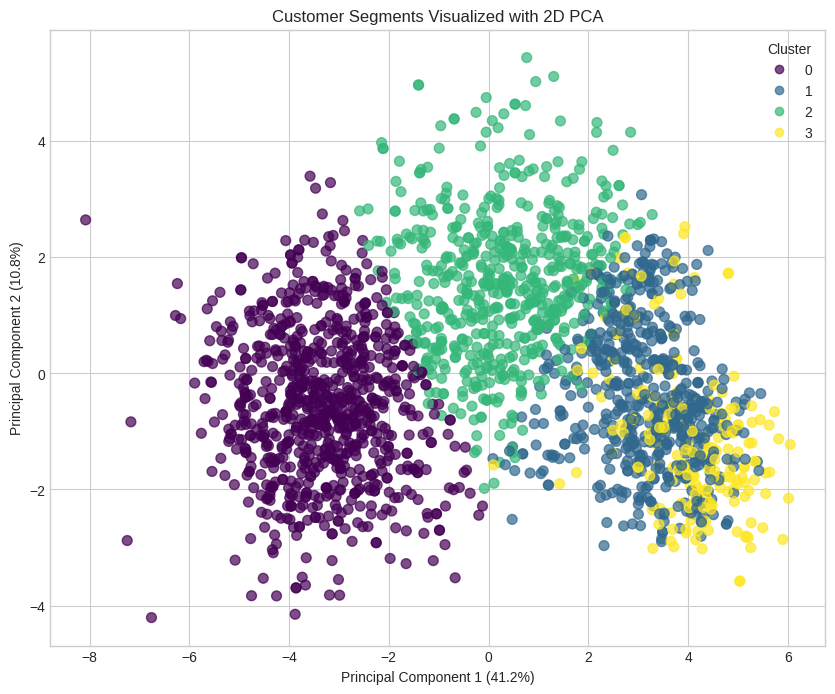

In [30]:
# Apply PCA with 2 components
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_clustering_scaled)

# Plot the 2D PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1],
                      c=df['Cluster'], cmap='viridis', s=50, alpha=0.7)

plt.title('Customer Segments Visualized with 2D PCA')
plt.xlabel(f'Principal Component 1 ({pca_2d.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'Principal Component 2 ({pca_2d.explained_variance_ratio_[1]:.1%})')

# Add a legend
legend = plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

In [31]:
# Interpret Cluster Profiles
print("\n--- Interpretation of Cluster Profiles ---")
print("Cluster 0: Moderate Age, Moderate Income, Moderate Spending & Purchases, Larger Family Size")
print("   - Characteristics: Average age and income, moderate spending and purchase frequency, tend to have larger families.")
print("Cluster 1: Younger/Middle Age, Lower Income, Low Spending & Purchases, Average Family Size")
print("   - Characteristics: Younger or middle-aged, significantly lower income, very low spending and purchase frequency, average family size.")
print("Cluster 2: Older/Middle Age, Higher Income, High Spending & Purchases, Smaller Family Size")
print("   - Characteristics: Older or middle-aged, higher income, high spending and purchase frequency, tend to have smaller families (often without children at home).")
print("Cluster 3: Middle Age, Highest Income, Highest Spending & Purchases, Smaller Family Size")
print("   - Characteristics: Middle-aged, highest income, highest spending and purchase frequency, tend to have smaller families (often without children at home).")


# Interpretation of PCA Visualization
print("\n--- Interpretation of PCA Visualization ---")
print("The PCA visualization shows a reasonable separation between the clusters.")
print("- Cluster 1 (Lower Income, Low Spending) appears distinct from the other clusters, occupying a separate region.")
print("- Clusters 2 and 3 (Higher Income, High Spending) are somewhat overlapping but generally occupy a different area than Cluster 1, indicating their higher engagement.")
print("- Cluster 0 (Moderate) seems to be positioned somewhat between the lower and higher spending/income groups.")
print("The visualization generally aligns with the characteristics observed in the cluster profiles, with income and spending likely being major drivers of the separation along the principal components.")



--- Interpretation of Cluster Profiles ---
Cluster 0: Moderate Age, Moderate Income, Moderate Spending & Purchases, Larger Family Size
   - Characteristics: Average age and income, moderate spending and purchase frequency, tend to have larger families.
Cluster 1: Younger/Middle Age, Lower Income, Low Spending & Purchases, Average Family Size
   - Characteristics: Younger or middle-aged, significantly lower income, very low spending and purchase frequency, average family size.
Cluster 2: Older/Middle Age, Higher Income, High Spending & Purchases, Smaller Family Size
   - Characteristics: Older or middle-aged, higher income, high spending and purchase frequency, tend to have smaller families (often without children at home).
Cluster 3: Middle Age, Highest Income, Highest Spending & Purchases, Smaller Family Size
   - Characteristics: Middle-aged, highest income, highest spending and purchase frequency, tend to have smaller families (often without children at home).

--- Interpretation o

In [32]:
# Add the 'Cluster' column back to the original DataFrame
df['Cluster'] = kmeans_final.labels_

display(df.head())

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Age,Days_As_Customer,ChildrenCount,Family_Size,marital_status,Total_Spent,Total_Purchases,Total_Campaign_Accepted,Education_Encoded,Cluster
0,58138.0,58,6.455199,4.488636,6.304449,5.153292,4.488636,4.488636,1.386294,2.197225,...,68,4797,0,1,0.000000,7.388946,22,0.693147,3,3
1,46344.0,38,2.484907,0.693147,1.945910,1.098612,0.693147,1.945910,1.098612,0.693147,...,71,4247,2,3,0.000000,3.332205,4,0.000000,3,0
2,71613.0,26,6.056784,3.912023,4.852030,4.718499,3.091042,3.761200,0.693147,2.197225,...,60,4446,0,2,0.693147,6.655440,20,0.000000,3,1
3,26646.0,26,2.484907,1.609438,3.044522,2.397895,1.386294,1.791759,1.098612,1.098612,...,41,4273,1,3,0.693147,3.988984,6,0.000000,3,0
4,58293.0,94,5.159055,3.784190,4.779123,3.850148,3.332205,2.772589,1.791759,1.791759,...,44,4295,1,3,0.693147,6.047372,14,0.000000,5,2


In [33]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [35]:
classifier = RandomForestClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [36]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[213   0   1   0]
 [  0 140   9   0]
 [  3   9 131   2]
 [  0   0   1  49]]


0.9551971326164874

In [37]:
final = pd.DataFrame()
final["Acctuate"] = y_test
final["Predicted"] = y_pred
final

,Acctuate,Predicted
0,1,1
1,0,0
2,3,3
3,0,0
4,0,0
...,...,...
553,0,0
554,0,0
555,3,3
556,0,0


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame with the 'Cluster' column
# Select features (X) and target (y)
X = df.drop('Cluster', axis=1)
y = df['Cluster']

# Standardize the features (important for Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

# Train a Logistic Regression model
log_reg = LogisticRegression(random_state=0, multi_class='auto') # 'auto' selects the solver based on the data
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Evaluation:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Logistic Regression Evaluation:
Confusion Matrix:
[[213   0   1   0]
 [  0 148   1   0]
 [  3   1 141   0]
 [  0   0   0  50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       214
           1       0.99      0.99      0.99       149
           2       0.99      0.97      0.98       145
           3       1.00      1.00      1.00        50

    accuracy                           0.99       558
   macro avg       0.99      0.99      0.99       558
weighted avg       0.99      0.99      0.99       558


Accuracy Score:
0.989247311827957


In [39]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame with the 'Cluster' column
# Select features (X) and target (y)
X = df.drop('Cluster', axis=1)
y = df['Cluster']

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

# Train an SVC model
svc_model = SVC(random_state=0)
svc_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svc_model.predict(X_test)

# Evaluate the model
print("Support Vector Classification (SVC) Evaluation:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Support Vector Classification (SVC) Evaluation:
Confusion Matrix:
[[212   0   2   0]
 [  0 143   6   0]
 [  3   3 139   0]
 [  0   0   1  49]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       214
           1       0.98      0.96      0.97       149
           2       0.94      0.96      0.95       145
           3       1.00      0.98      0.99        50

    accuracy                           0.97       558
   macro avg       0.98      0.97      0.97       558
weighted avg       0.97      0.97      0.97       558


Accuracy Score:
0.9731182795698925


In [40]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame with the 'Cluster' column
# Select features (X) and target (y)
X = df.drop(['Total_Spent'], axis=1) # Exclude 'Total_Spent' and 'Cluster' from features
y = df['Total_Spent'] # Target variable is 'Total_Spent'

# Standardize the features (important for SVR)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

# Train an SVR model
# You might need to tune the parameters (C, epsilon, kernel) for better performance
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Evaluate the model
print("Support Vector Regression (SVR) Evaluation for Total_Spent:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared (R2): {r2_score(y_test, y_pred):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")

Support Vector Regression (SVR) Evaluation for Total_Spent:
Mean Squared Error (MSE): 0.03
R-squared (R2): 0.98
Mean Absolute Error (MAE): 0.10


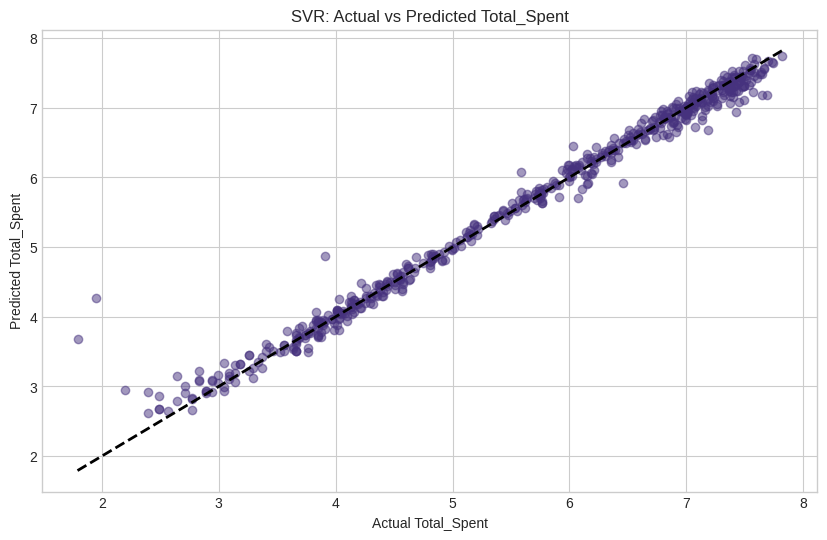

In [41]:
# Plot actual vs predicted values for SVR
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add a diagonal line for reference
plt.xlabel('Actual Total_Spent')
plt.ylabel('Predicted Total_Spent')
plt.title('SVR: Actual vs Predicted Total_Spent')
plt.grid(True)
plt.show()

In [42]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame with the 'Cluster' column
# Select features (X) and target (y)
# Exclude 'Total_Spent' and 'Cluster' from features
X = df.drop(['Total_Spent', 'Cluster'], axis=1)
y = df['Total_Spent'] # Target variable is 'Total_Spent'

# Standardize the features
scaler_lasso = StandardScaler()
X_scaled_lasso = scaler_lasso.fit_transform(X)

# Split the data into training and testing sets
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_scaled_lasso, y, test_size=0.25, random_state=0)

# Train a Lasso Regression model
# LassoCV finds the optimal alpha (regularization strength) using cross-validation
lasso_reg = LassoCV(cv=5, random_state=0, n_jobs=-1)
lasso_reg.fit(X_train_lasso, y_train_lasso)

# Make predictions on the test set
y_pred_lasso = lasso_reg.predict(X_test_lasso)

# Evaluate the model
print("Lasso Regression Evaluation for Total_Spent:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test_lasso, y_pred_lasso):.2f}")
print(f"R-squared (R2): {r2_score(y_test_lasso, y_pred_lasso):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test_lasso, y_pred_lasso):.2f}")

# Display the coefficients
print("\nLasso Coefficients:")
lasso_coefficients = pd.Series(lasso_reg.coef_, index=X.columns)
print(lasso_coefficients[lasso_coefficients != 0].sort_values(ascending=False)) # Show only non-zero coefficients

Lasso Regression Evaluation for Total_Spent:
Mean Squared Error (MSE): 0.06
R-squared (R2): 0.98
Mean Absolute Error (MAE): 0.17

Lasso Coefficients:
MntWines                   0.594971
MntMeatProducts            0.376956
MntGoldProds               0.147602
NumWebPurchases            0.106494
NumCatalogPurchases        0.105138
NumDealsPurchases          0.062702
Total_Purchases            0.062337
Total_Campaign_Accepted    0.057116
MntFruits                  0.042243
MntFishProducts            0.039856
MntSweetProducts           0.038833
Income                     0.034414
Days_As_Customer           0.028353
NumStorePurchases          0.004959
Recency                   -0.001260
Education_Encoded         -0.015076
NumWebVisitsMonth         -0.031418
Response                  -0.033718
ChildrenCount             -0.094840
dtype: float64


In [43]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming 'df' is your DataFrame with the 'Cluster' column
# Select features (X) and target (y)
X = df.drop('Cluster', axis=1)
y = df['Cluster']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

# Define the individual classifiers
clf1 = LogisticRegression(random_state=0, multi_class='auto')
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(probability=True, random_state=0) # SVC needs probability=True for soft voting

# Create the Voting Classifier
# 'soft' voting uses predicted probabilities, 'hard' voting uses predicted class labels
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('svc', clf3)], voting='soft')
eclf1 = eclf1.fit(X_train, y_train)
y_pred_ensemble = eclf1.predict(X_test)

# Evaluate the ensemble model
print("Voting Ensemble (Soft Voting) Evaluation:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ensemble))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ensemble))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_ensemble))

# You can also try 'hard' voting
eclf2 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('svc', clf3)], voting='hard')
eclf2 = eclf2.fit(X_train, y_train)
y_pred_ensemble_hard = eclf2.predict(X_test)

print("\nVoting Ensemble (Hard Voting) Evaluation:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ensemble_hard))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ensemble_hard))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_ensemble_hard))

Voting Ensemble (Soft Voting) Evaluation:
Confusion Matrix:
[[213   0   1   0]
 [  0 145   4   0]
 [  2   2 141   0]
 [  0   0   1  49]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       214
           1       0.99      0.97      0.98       149
           2       0.96      0.97      0.97       145
           3       1.00      0.98      0.99        50

    accuracy                           0.98       558
   macro avg       0.98      0.98      0.98       558
weighted avg       0.98      0.98      0.98       558


Accuracy Score:
0.982078853046595

Voting Ensemble (Hard Voting) Evaluation:
Confusion Matrix:
[[213   0   1   0]
 [  0 143   6   0]
 [  3   3 139   0]
 [  0   0   1  49]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       214
           1       0.98      0.96      0.97       149
           2       0.95      0.96      0.95 

SVR Performance:
R² Score: 0.9381
RMSE: 0.37
MAE: 0.26


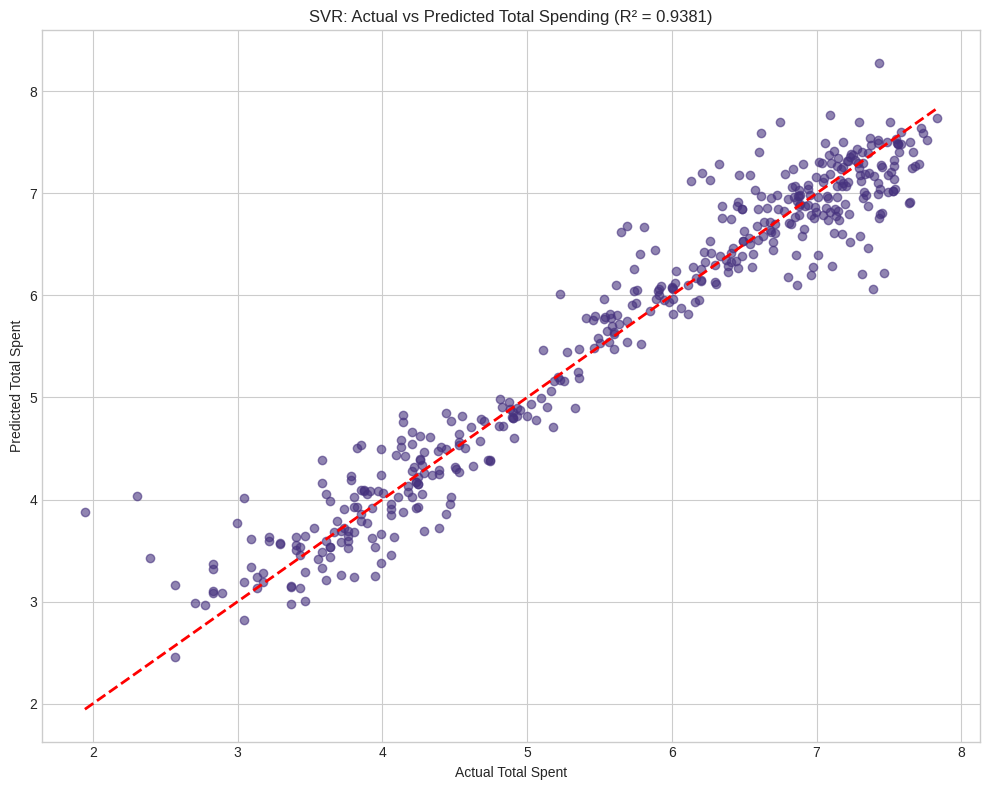

In [44]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (Total_Spent is the target, so it is REMOVED from the feature list)
regression_features = ['Age', 'Income', 'Education_Encoded', 'Total_Purchases', 'Family_Size', 'Recency', 'NumWebVisitsMonth']
X_reg = df[regression_features]
y_reg = df['Total_Spent']

# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42)

scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)
# Train SVR for spending prediction
svr_model = SVR(kernel='rbf', C=100, gamma=0.1)
svr_model.fit(X_train_reg_scaled, y_train_reg)

# Make predictions
y_pred_svr = svr_model.predict(X_test_reg_scaled)

# Evaluate model
svr_r2 = r2_score(y_test_reg, y_pred_svr)
svr_rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_svr))
svr_mae = mean_absolute_error(y_test_reg, y_pred_svr)

print(f"SVR Performance:")
print(f"R² Score: {svr_r2:.4f}")
print(f"RMSE: {svr_rmse:.2f}")
print(f"MAE: {svr_mae:.2f}")

# Plot actual vs predicted
plt.figure(figsize=(10, 8))
plt.scatter(y_test_reg, y_pred_svr, alpha=0.6)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel('Actual Total Spent')
plt.ylabel('Predicted Total Spent')
plt.title(f'SVR: Actual vs Predicted Total Spending (R² = {svr_r2:.4f})')
plt.tight_layout()
plt.show()

In [45]:
x = df.drop('Cluster', axis=1)
y = df['Cluster']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Define the transformations for each column type
# 'Education_Encoded' is already ordinally encoded
# No specific transformer needed for Education_Encoded in this preprocessor
# if it's already in the desired numerical format.

# 'Marital_Status' was mapped to binary (Partner/Single)
# Assuming 'Partner' was mapped to 1 and 'Single' to 0, it's already numerical
# We can scale this binary numerical column

# 'Family_Size' is numerical, we can scale it


# Create the column transformer to apply different transformations to different columns
# 'Education_Encoded', 'Family_Size', and 'marital_status' are now numerical
# We will scale 'Family_Size' and 'marital_status' and pass the rest through,
# including 'Education_Encoded' as it's already numerical.
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical_scaler', StandardScaler(), ['Income', 'Recency', 'MntWines', 'MntFruits',
                                               'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                                               'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                                               'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                                               'Age', 'Days_As_Customer', 'ChildrenCount', 'Family_Size',
                                               'marital_status', 'Total_Spent', 'Total_Purchases',
                                               'Total_Campaign_Accepted', 'Education_Encoded']) # Include all numerical and already encoded columns
    ],
    remainder='passthrough' # This should not be needed if all relevant columns are in the transformer list
)


# Display the preprocessor (optional)
print("Preprocessor created:")
print(preprocessor)

Preprocessor created:
ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical_scaler', StandardScaler(),
                                 ['Income', 'Recency', 'MntWines', 'MntFruits',
                                  'MntMeatProducts', 'MntFishProducts',
                                  'MntSweetProducts', 'MntGoldProds',
                                  'NumDealsPurchases', 'NumWebPurchases',
                                  'NumCatalogPurchases', 'NumStorePurchases',
                                  'NumWebVisitsMonth', 'Age',
                                  'Days_As_Customer', 'ChildrenCount',
                                  'Family_Size', 'marital_status',
                                  'Total_Spent', 'Total_Purchases',
                                  'Total_Campaign_Accepted',
                                  'Education_Encoded'])])


In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Define the individual classifiers (using the same ones as before)
clf1 = LogisticRegression(random_state=0, multi_class='auto')
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(probability=True, random_state=0) # SVC needs probability=True for soft voting

# Create the Voting Classifier
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('svc', clf3)], voting='soft')

# Create the final pipeline
final_pipeline = make_pipeline(preprocessor, eclf1)

print("Final pipeline created:")
print(final_pipeline)

Final pipeline created:
Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical_scaler',
                                                  StandardScaler(),
                                                  ['Income', 'Recency',
                                                   'MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                          

In [49]:
final_pipeline.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical_scaler',
                                                  StandardScaler(),
                                                  ['Income', 'Recency',
                                                   'MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth', 'Age',
                                                   '...,
                                                   'ChildrenCount',
                                                   'Family_Size',
                                                   'marital_status',
                                                   'Total_Spent',
                                                   'Total_Purchases',
                                                   'Total_Campaign_Accepted',
                                                   'Education_Encoded'])])),
                ('votingclassifier',
                 VotingClassifier(estimators=[('lr',
                                               LogisticRegression(multi_class='auto',
                                                                  random_state=0)),
                                              ('rf',
                                               RandomForestClassifier(random_state=0)),
                                              ('svc',
                                               SVC(probability=True,
                                                   random_state=0))],
                                  voting='soft'))])

In [50]:
final_pipeline.score(x_test, y_test)

0.9820627802690582

In [51]:
import pickle

In [52]:
filename = 'classifier.pkl' # create a variable with name you wanna give to the file
pickle.dump(final_pipeline, open(filename,'wb'))

In [53]:
!pip install -q streamlit
!npm install -g localtunnel -U

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴
changed 22 packages in 2s
⠴
⠴3 packages are looking for funding
⠴  run `npm fund` for details
⠴

In [54]:
%%writefile customer_segmentation_app.py
# importing necessary libraries
import pickle
import streamlit as st
import pandas as pd
import numpy as np

#load the model
classifier = pickle.load(open('classifier.pkl','rb'))


#page configuration
st.set_page_config(page_title = 'Customer Segmentation Web App', layout='centered')
st.title('Customer Segmentation Web App')

# customer segmentation function
def segment_customers(input_data):

    prediction=classifier.predict(pd.DataFrame(input_data, columns=['Income','Kidhome','Teenhome','Age','Partner','Education_Level']))
    print(prediction)
    pred_1 = 0
    if prediction == 0:
            pred_1 = 'cluster 0'

    elif prediction == 1:
            pred_1 = 'cluster 1'

    elif prediction == 2:
            pred_1 = 'cluster 2'

    elif prediction == 3:
            pred_1 = 'cluster 3'

    return pred_1

def main():

    Income = st.text_input("Type In The Household Income")
    Kidhome = st.radio ( "Select Number Of Kids In Household", ('0', '1','2') )
    Teenhome = st.radio ( "Select Number Of Teens In Household", ('0', '1','2') )
    Age = st.slider ( "Select Age", 18, 85 )
    Partner = st.radio ( "Livig With Partner?", ('Yes', 'No') )
    Education_Level = st.radio ( "Select Education", ("Undergraduate", "Graduate", "Postgraduate") )

    result = ""

    # when 'Predict' is clicked, make the prediction and store it
    if st.button("Segment Customer"):
        result=segment_customers([[Income,Kidhome,Teenhome,Age,Partner,Education_Level]])

    st.success(result)


if __name__ == '__main__':
        main ()


Overwriting customer_segmentation_app.py


In [ ]:
!streamlit run customer_segmentation_app.py & npx localtunnel --port 8501

⠙⠹

⠸⠼⠴⠦⠧
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.21.84.67:8501

⠇⠏⠋⠙⠹⠸your url is: https://many-ways-care.loca.lt
